In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
from metpy.calc import dewpoint_from_specific_humidity, equivalent_potential_temperature, potential_temperature
from metpy.units import units as munits
from tqdm.auto import tqdm
import os
from numba import njit
import uxarray as uxr
from setup_mpl_tex import setup_mpl_tex

In [2]:
vgrid_file = '/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline/heuer_atm_amip_R2B4_vlvl60_baseline_vgrid_atm_vgrid_ml.nc'
grid_file = '/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline/icon_grid_0013_R02B04_G.nc'
grid = xr.open_dataset(grid_file)
vgrid = uxr.open_dataset(grid_file, vgrid_file)
# zg = grid.zg.values
# zghalf = grid.zghalf.values
# dzghalf = grid.dzghalf.values
# zghalf.shape, dzghalf.shape, zg.shape

In [13]:
def get_ds_from_basepath(basepath):
    file_list = sorted(glob(os.path.join(basepath, '*atm_3d_ml*')))
    print(f'Found {len(file_list)} sample files')
    timesteps = range(len(file_list))#range(12)
    # ds = uxr.open_mfdataset(grid_file, file_list)#, concat_dim='time')
    ds2d = uxr.open_mfdataset(grid_file, [f.replace('atm_3d', 'atm_2d') for f in file_list])#, concat_dim='time')
    # ds = xr.concat(
    #     [xr.open_dataset(file_list[it]) for it in timesteps],
    #     dim='time')
    # ds2d = xr.concat(
    #     [xr.open_dataset(file_list[it].replace('atm_3d', 'atm_2d')) for it in timesteps],
    #     dim='time')
    
    # ds['pr'] = ds2d['pr']
    # ds['prcr'] = ds2d['prcr']
    # ds['prcs'] = ds2d['prcs']
    # ds['extra_2d5'] = ds2d['extra_2d5']
    # ds['ts'] = ds2d['ts']
    # ds['prw'] = ds2d['prw']
    # if 'rtype' in list(ds2d):
    #     ds['rtype'] = ds2d['rtype']
    return ds2d

# ds_tiedtke = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline/')
# ds_ml = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml/')
# # ds_ml = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml_pinn385weight0.1/')
# ds_mix = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_60p1_pinn385weight0.1')

ds_mix = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_60p1_pinn385weight0.1_extra2d5fix')
# ds_mix = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_70p1_pinn385weight0.1_extra2d5fix')
# ds_mix = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_80p1_pinn385weight0.1_extra2d5fix')

# ds_mix2 = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_20p0_80p1_pinn385weight0.5/')
# ds_mix3 = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_30p0_90p1_pinn385weight0.5/')
# # ds_mix = get_ds_from_basepath('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_60p1/')

Found 12 sample files


In [14]:
print('Overall average ML weight: ', ds_mix.extra_2d5.mean().values)

Overall average ML weight:  0.6708962


In [15]:
# ds_mix.extra_2d5.isel(time=1).plot()#vmin=0, vmax=1)
# ds_mix.extra_2d5.mean('time').plot()
# ds_mix.ts.isel(time=5).plot()
# ds_tiedtke.ts.isel(time=5).plot()
# ds_mix.ts.mean('time').plot()

In [16]:
ds_mix

<xarray.UxDataset>
Dimensions:    (height: 1, height_2: 1, lev: 1, time: 12, n_face: 20480)
Coordinates:
  * height     (height) float64 10.0
  * height_2   (height_2) float64 2.0
  * lev        (lev) float64 0.0
  * time       (time) float64 2.01e+07 2.01e+07 2.01e+07 ... 2.01e+07 2.011e+07
Dimensions without coordinates: n_face
Data variables: (12/49)
    orog       (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    ps         (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    psl        (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    cosmu0     (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    rsdt       (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    rsut       (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    ...         ...
    ptp        (time, lev, n_face) float32 dask.array<chunksize=(1, 1, 20480), meta=np.ndarray>
    extra_2d1  (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    extra_2d2  (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    extra_2d3  (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    extra_2d4  (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>
    extra_2d5  (time, n_face) float32 dask.array<chunksize=(1, 20480), meta=np.ndarray>

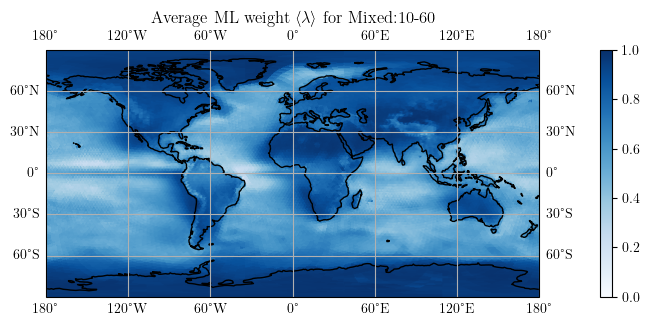

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.crs import PlateCarree

setup_mpl_tex()

projection = ccrs.PlateCarree()#ccrs.Robinson()
fig, ax = plt.subplots(
    subplot_kw={"projection": projection}, constrained_layout=True,# figsize=(9, 6),
)

ax.set_global()

raster = ds_mix["extra_2d5"].mean('time').to_raster(ax=ax)
# raster = ds_mix["ts"].mean('time').to_raster(ax=ax)

img = ax.imshow(
    raster, cmap="Blues", origin="lower", extent=ax.get_xlim() + ax.get_ylim(), vmin=0, vmax=1
)
ax.set_title("Average ML weight $\\langle\\lambda\\rangle$ for Mixed:10-60")
ax.coastlines()
ax.gridlines(draw_labels=True)

# Adding a colorbar (the examples below will not include one to keep things concise)
cbar = fig.colorbar(img, ax=ax, fraction=0.025)#, label="Average ML weight $\\langle\\lambda\\rangle$")
# fig.colorbar(mapplot, ax=ax, orientation="horizontal", shrink=0.75, label='$\\lambda$')

# fig.savefig("Figures/lambda_spatial_distribution_10p0_60p1_0.1alpha.pdf", bbox_inches='tight')

In [7]:
import cartopy.crs as ccrs
import matplotlib.colors as colors

In [8]:
def fix_periodicity_for_triplot(clon_bnds):
    '''
    Takes in clon bnds coordinate list and adds/subtracts 2pi
    to/from all points where one edge is with other sign
    '''
    mask = np.any(np.abs(np.diff(clon_bnds, axis=1)) > 4, axis=1)
    vert_sign_sum = np.sum(np.sign(clon_bnds), axis=1)
    pmask = np.sign(vert_sign_sum)[:,None] > np.sign(clon_bnds)
    pmask = pmask & mask[:,None]
    nmask = np.sign(vert_sign_sum)[:,None] < np.sign(clon_bnds)
    nmask = nmask & mask[:,None]

    clon_bnds[pmask] += 2*np.pi
    clon_bnds[nmask] -= 2*np.pi
    return clon_bnds

In [9]:
def rad2degr(x):
    return x*180/np.pi

def plot_icon_tricolor(ax, clon_bnds, clat_bnds, vals, **kwargs):
    a = rad2degr(clon_bnds.flatten()[:])
    b = rad2degr(clat_bnds.flatten()[:])
    c = np.arange(clon_bnds.size).reshape(clon_bnds.shape)
    print(a.shape, b.shape, c.shape, vals.shape)
    plot = ax.tripcolor(a,
                        b,
                        c,
                        vals,
                        **kwargs)
    
    return plot

(61440,) (61440,) (20480, 3) (20480,)


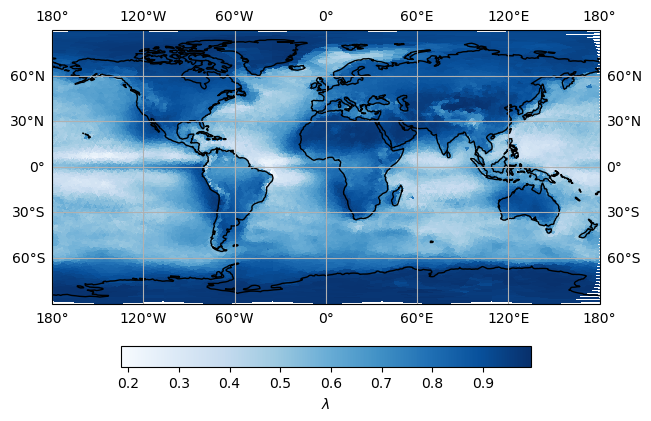

In [14]:
current_cmap = plt.get_cmap(name='Blues').copy()
# current_cmap.set_bad(color='#bcb5bb')

vals = ds_mix.extra_2d5.mean('time').values
# vals = ds_mix.extra_2d5.isel(time=slice(3,9)).mean('time').values
# vals = np.mean(np.stack([ds.extra_2d5.mean('time').values for ds in [ds_mix, ds_mix2, ds_mix3]]), axis=0)

figsize=[6.4,4.8]
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=[1*s for s in figsize], constrained_layout=True)#, figsize=[2*e for e in cpm_tex.set_size('textwidth')])

minval = np.min(vals)
maxval = np.max(vals)
mapplot = plot_icon_tricolor(ax,
                             fix_periodicity_for_triplot(grid.clon_vertices.values),
                             grid.clat_vertices.values,
                             vals,
                             cmap=current_cmap,
                             vmin=minval,
                             vmax=maxval,
                            )

fig.colorbar(mapplot, ax=ax, orientation="horizontal", shrink=0.75, label='$\\lambda$')
# fig.suptitle('\inftyp0_\inftyp1_0.01$\\alpha$')
# fig.suptitle('Tiedtke')
# fig.suptitle(label_mix1)
# fig.suptitle('ML')
# fig.suptitle('ML - $0.1\\alpha$')

ax.coastlines()
ax.gridlines(draw_labels=True)
# fig.savefig('Figures/LST_map_ml_pinn.png', dpi=300)

plt.show()